In [ ]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import torch
import numpy as np

import os
from utils.data_generation import fetch_grid, sample_joint_distribution

# Set up directories
example_dir = f'{os.getcwd()}/results'
assets_dir = f'{os.getcwd()}/assets'
datasets_dir = f'{os.getcwd()}/datasets'
os.makedirs(example_dir, exist_ok=True)
os.makedirs(assets_dir, exist_ok=True)

# Fetch full grid

See Brutus demos / Overview 2

In [116]:
params, seds = fetch_grid(assets_dir=assets_dir)
params.shape, seds.shape

((613708,), (613708,))

In [117]:
seds

array([([18.19728346,  1.25278265, -0.03206383], [ 1.75730577e+01,  8.89797193e-01, -1.67880120e-02], [17.28587334,  0.82235891, -0.07383208], [17.15024835,  0.78774578, -0.10512149], [17.07429958,  0.71503044, -0.10806384], [16.14162347,  0.47758496, -0.07520821], [15.67839065,  0.28444192, -0.04401363], [15.56693825,  0.17381236, -0.0266504 ]),
       ([18.20988005,  1.25243168, -0.0320729 ], [ 1.75764862e+01,  8.89830601e-01, -1.67921790e-02], [17.29062775,  0.82254368, -0.07383959], [17.1541451 ,  0.78755626, -0.10513209], [17.07667031,  0.71502403, -0.10805325], [16.14080089,  0.47755572, -0.07518242], [15.672236  ,  0.28498098, -0.04412921], [15.55996953,  0.17379626, -0.02664981]),
       ([18.22290789,  1.25204485, -0.03207939], [ 1.75803603e+01,  8.89724244e-01, -1.67939851e-02], [17.29530547,  0.82272804, -0.07384517], [17.15801796,  0.78733098, -0.10514092], [17.07885171,  0.71502333, -0.10804421], [16.13980647,  0.47752318, -0.07515488], [15.66519803,  0.28550046, -0.044239

# Sample from the joint distribution

In [118]:
theta, x = sample_joint_distribution(params=params,
                                     seds=seds,
                                     args={'age_feh_hyperparam': -1.0},
                                     n_samples=10_000,
                                     assets_dir=assets_dir,)

In [119]:
x

array([([-0.06789364], [-0.18303527], [-0.25316465], [-0.28723496], [-0.3079936 ], [-0.43531285], [-0.50744005], [-0.52291446], [ 9.09327689]),
       ([-0.18453874], [-0.25982706], [-0.29939326], [-0.31982737], [-0.33196764], [-0.40831033], [-0.45801656], [-0.46883949], [17.04612574]),
       ([-0.24044343], [-0.29420205], [-0.31865556], [-0.33214393], [-0.33976728], [-0.39274088], [-0.42842945], [-0.4364999 ], [23.7498046 ]),
       ...,
       ([-0.02060025], [-0.12244487], [-0.24677574], [-0.29881333], [-0.33399009], [-0.43615678], [-0.5047389 ], [-0.52711643], [15.9064425 ]),
       ([-0.23684277], [-0.28946677], [-0.3106018 ], [-0.31968728], [-0.32524781], [-0.39901446], [-0.44188667], [-0.44852932], [14.15749852]),
       ([ 0.23813541], [ 0.04641541], [-0.07315191], [-0.12985208], [-0.16182682], [-0.43814634], [-0.57767821], [-0.60584827], [ 3.77107806])],
      dtype=[('PS_g', '<f8', (1,)), ('PS_r', '<f8', (1,)), ('PS_i', '<f8', (1,)), ('PS_z', '<f8', (1,)), ('PS_y', '<f8', (1

<Figure size 1200x1200 with 0 Axes>

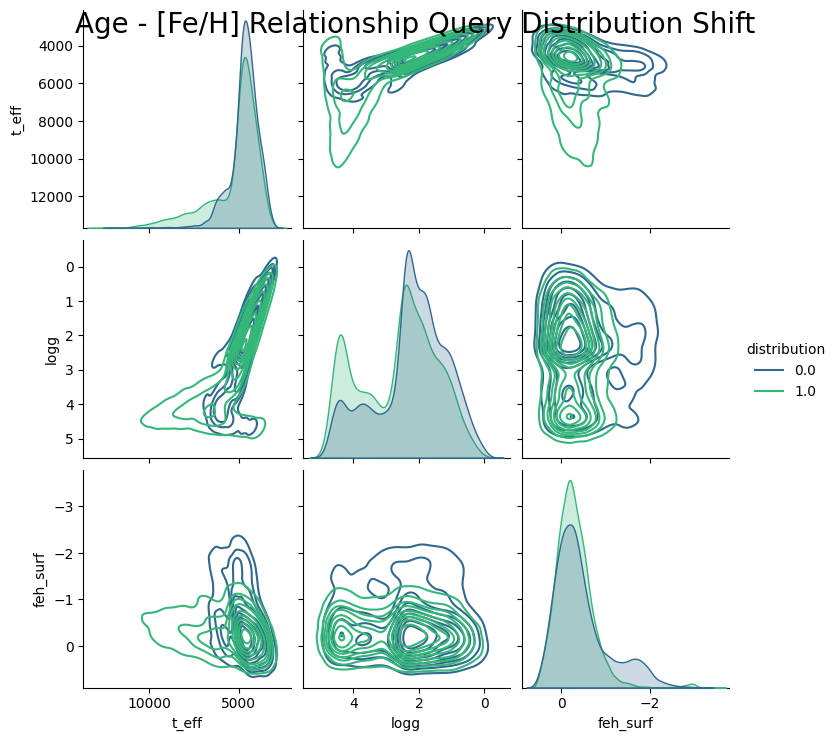

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_imbued_query_distribution_age_feh(labels = ['t_eff', 'logg', 'feh_surf', 'logl'], age_feh_hyperparams=[-1.0, 1.0]):

    samples_structured = [
        sample_joint_distribution(params=params,
                                  seds=seds,
                                  args={'age_feh_hyperparam': hp},
                                  n_samples=10_000,
                                  assets_dir=assets_dir,)[0]
        for hp in age_feh_hyperparams
    ]
    samples = [np.array(samples_structured_set[labels].tolist()) for samples_structured_set in samples_structured]
    samples_adj = []
    for idx, sample in enumerate(samples):
        samples_adj.append(np.hstack((sample, np.full((sample.shape[0], 1), idx))))
    samples = pd.concat([pd.DataFrame(sample, columns=labels + ['distribution']) for sample in samples_adj], axis=0)

    plt.figure(figsize=(12, 12))
    g = sns.pairplot(samples, kind='kde', hue='distribution', palette='viridis', diag_kind='kde', diag_kws={'common_norm': False})
    
    for ax in g.axes.ravel():
        ax.invert_xaxis()
        ax.invert_yaxis()

    plt.suptitle('Age - [Fe/H] Relationship Query Distribution Shift', fontsize=20)
    plt.show()
    plt.close()


plot_imbued_query_distribution_age_feh()